In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

w = pd.read_csv('Data/w_data.csv', sep=';')
p = pd.read_csv('Data/p_data.csv', sep=';')

In [2]:
w.head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


In [3]:
p.head()

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [4]:
wp = pd.merge(w, p, on="ID")
wp.head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [5]:
len(w.value_counts('ID'))

48843

In [6]:
len(p.value_counts('ID'))

48842

In [7]:
len(wp.value_counts('ID'))

48842

In [8]:
#Tienen 48842 ID en común

In [9]:
wp_left = pd.merge(w, p, how='left', on="ID", indicator=True)
wp_left

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,_merge
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.,39.0,Female,White,United-States,Bachelors,13.0,Divorced,Not-in-family,both
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.,64.0,Male,Black,United-States,HS-grad,9.0,Widowed,Other-relative,both
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.,38.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
48841,Private,83891.0,5455.0,0.0,40.0,161771296,<=50K.,44.0,Male,Asian-Pac-Islander,United-States,Bachelors,13.0,Divorced,Own-child,both


In [10]:
#Registro que no tienen en común
wp_exclude = wp_left[wp_left['_merge'] == 'left_only']
wp_exclude

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,_merge
48842,Self-emp-inc,182148.0,0.0,0.0,60.0,1344995623,>50K.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [11]:
wp_left["Target"].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: Target, dtype: int64

In [12]:
wp_left = wp_left.replace(to_replace="<=50K", value="<=50k", regex=True)
wp_left = wp_left.replace(to_replace="<=50k.", value="<=50k", regex=True)
wp_left = wp_left.replace(to_replace=">50K", value=">50k", regex=True)
wp_left = wp_left.replace(to_replace=">50k.", value=">50k", regex=True)

In [13]:
wp_left["Target"].value_counts()

 <=50k    37155
 >50k     11687
Name: Target, dtype: int64

In [14]:
wp_sex = wp_left["Target"].groupby([wp_left["Sex"], wp_left["Target"]]).count()
wp_sex

Sex      Target
 Female   <=50k    14423
          >50k      1769
 Male     <=50k    22732
          >50k      9917
Name: Target, dtype: int64

In [15]:
wp_sex.unstack(level="Sex")

Sex,Female,Male
Target,,
<=50k,14423,22732
>50k,1769,9917


array([<AxesSubplot:ylabel=' Female'>, <AxesSubplot:ylabel=' Male'>],
      dtype=object)

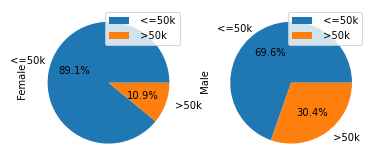

In [16]:
wp_sex.unstack(level="Sex").plot(kind='pie',autopct='%1.1f%%', subplots=True)

In [17]:
wp_race = wp_left["Target"].groupby([wp_left["Race"], wp_left["Target"]]).count()
wp_race

Race                 Target
 Amer-Indian-Eskimo   <=50k      415
                      >50k        55
 Asian-Pac-Islander   <=50k     1110
                      >50k       409
 Black                <=50k     4119
                      >50k       566
 Other                <=50k      356
                      >50k        50
 White                <=50k    31155
                      >50k     10606
Name: Target, dtype: int64

array([<AxesSubplot:ylabel=' Amer-Indian-Eskimo'>,
       <AxesSubplot:ylabel=' Asian-Pac-Islander'>,
       <AxesSubplot:ylabel=' Black'>, <AxesSubplot:ylabel=' Other'>,
       <AxesSubplot:ylabel=' White'>], dtype=object)

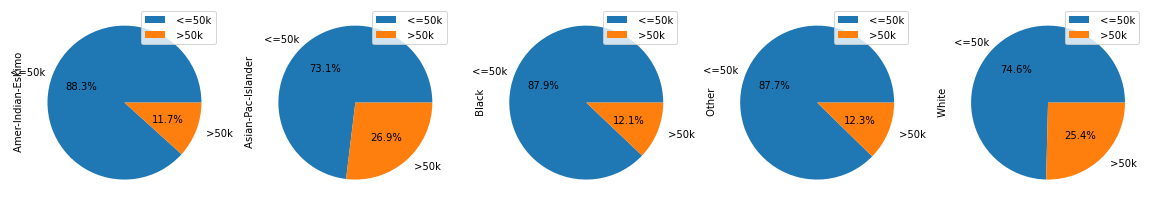

In [18]:
wp_race.unstack(level="Race").plot(kind='pie',autopct='%1.1f%%', figsize=(20, 10), subplots=True)

In [19]:
wp_education = wp_left["Target"].groupby([wp_left["Education"], wp_left["Target"]]).count()
wp_education

Education      Target
 10th           <=50k     1302
                >50k        87
 11th           <=50k     1720
                >50k        92
 12th           <=50k      609
                >50k        48
 1st-4th        <=50k      239
                >50k         8
 5th-6th        <=50k      482
                >50k        27
 7th-8th        <=50k      893
                >50k        62
 9th            <=50k      715
                >50k        41
 Assoc-acdm     <=50k     1188
                >50k       413
 Assoc-voc      <=50k     1539
                >50k       522
 Bachelors      <=50k     4712
                >50k      3312
 Doctorate      <=50k      163
                >50k       431
 HS-grad        <=50k    13281
                >50k      2503
 Masters        <=50k     1198
                >50k      1459
 Preschool      <=50k       82
                >50k         1
 Prof-school    <=50k      217
                >50k       617
 Some-college   <=50k     8815
                >

array([<AxesSubplot:ylabel=' 10th'>, <AxesSubplot:ylabel=' 11th'>,
       <AxesSubplot:ylabel=' 12th'>, <AxesSubplot:ylabel=' 1st-4th'>,
       <AxesSubplot:ylabel=' 5th-6th'>, <AxesSubplot:ylabel=' 7th-8th'>,
       <AxesSubplot:ylabel=' 9th'>, <AxesSubplot:ylabel=' Assoc-acdm'>,
       <AxesSubplot:ylabel=' Assoc-voc'>,
       <AxesSubplot:ylabel=' Bachelors'>,
       <AxesSubplot:ylabel=' Doctorate'>, <AxesSubplot:ylabel=' HS-grad'>,
       <AxesSubplot:ylabel=' Masters'>, <AxesSubplot:ylabel=' Preschool'>,
       <AxesSubplot:ylabel=' Prof-school'>,
       <AxesSubplot:ylabel=' Some-college'>], dtype=object)

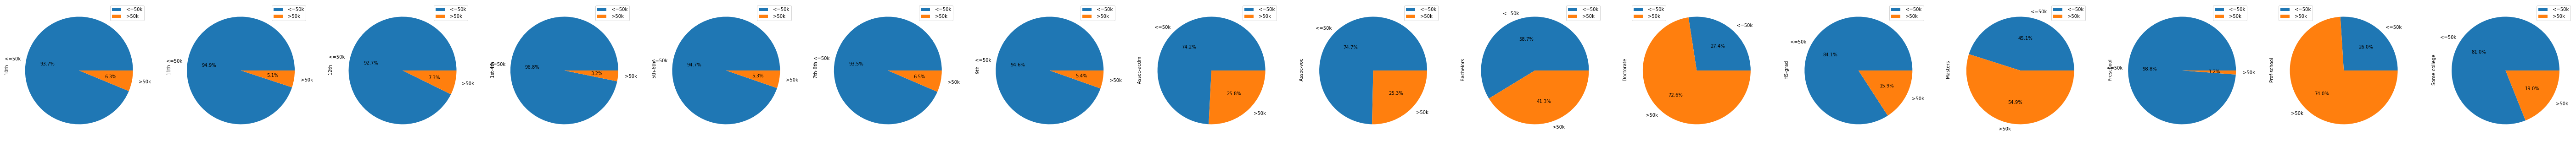

In [20]:
wp_education.unstack(level="Education").plot(kind='pie',autopct='%1.1f%%', figsize=(100, 50), subplots=True)

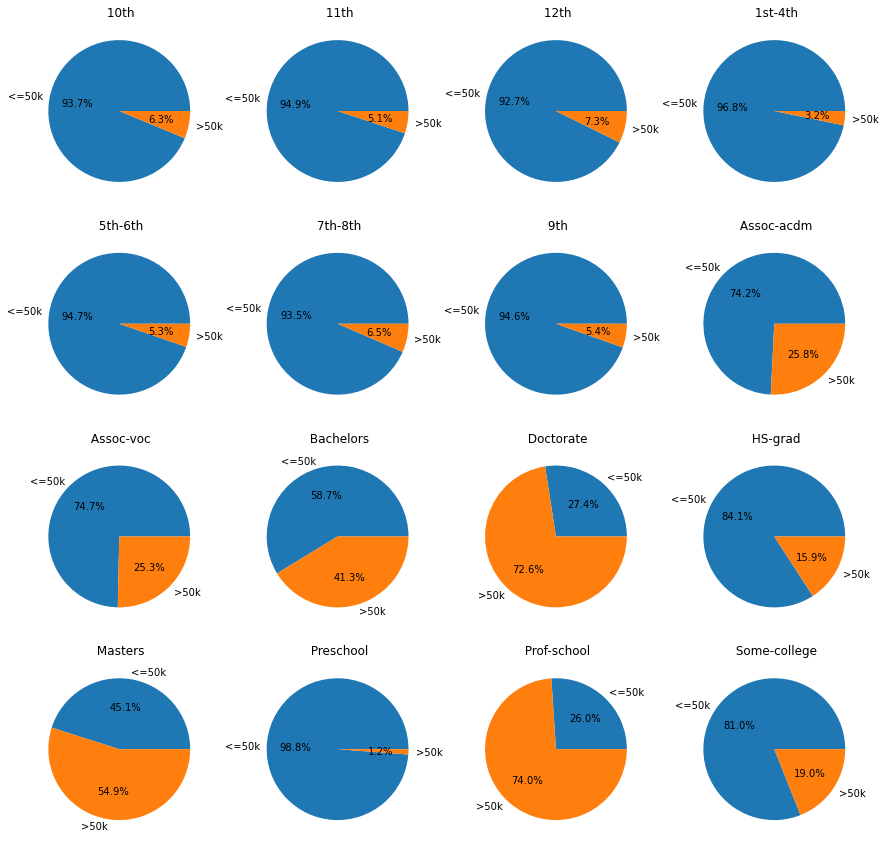

In [147]:
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(15, 15)

education_values = wp_left['Education'].sort_values().dropna().unique()
rows= len(education_values)//4
cols= len(education_values)//4
idx=0

for row in range(rows):    
    for col in range(cols):
        ax1 = plt.subplot2grid((4,4),(row,col))
        plt.pie(wp_education[2*idx:(2*idx)+2], labels=('<=50k', '>50k'), autopct='%1.1f%%')
        plt.title(education_values[idx])
        idx+=1
